<a href="https://colab.research.google.com/github/Byeon-MJ/DL_Practice_Repo/blob/main/RNN_Reusters_News_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.utils import pad_sequences, np_utils

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [15]:
# 데이터셋 Load, Split
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=1000, test_split=0.2)

In [16]:
category = np.max(Y_train) + 1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [18]:
# 데이터 전처리
x_train = pad_sequences(X_train, maxlen=100)
x_test = pad_sequences(X_test, maxlen=100)
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

In [19]:
# 모델 생성
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
history = model.fit(x_train, y_train, batch_size=100, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
90/90 [==============================] - 22s 146ms/step - loss: 2.6119 - accuracy: 0.3408 - val_loss: 2.3975 - val_accuracy: 0.3651
Epoch 2/20
90/90 [==============================] - 7s 73ms/step - loss: 2.1121 - accuracy: 0.4668 - val_loss: 1.9936 - val_accuracy: 0.5107
Epoch 3/20
90/90 [==============================] - 3s 38ms/step - loss: 1.8301 - accuracy: 0.5315 - val_loss: 1.7940 - val_accuracy: 0.5392
Epoch 4/20
90/90 [==============================] - 2s 18ms/step - loss: 1.7044 - accuracy: 0.5605 - val_loss: 1.7103 - val_accuracy: 0.5810
Epoch 5/20
90/90 [==============================] - 1s 16ms/step - loss: 1.6388 - accuracy: 0.5776 - val_loss: 1.7202 - val_accuracy: 0.5695
Epoch 6/20
90/90 [==============================] - 2s 17ms/step - loss: 1.6072 - accuracy: 0.5926 - val_loss: 1.6438 - val_accuracy: 0.5788
Epoch 7/20
90/90 [==============================] - 2s 20ms/step - loss: 1.4681 - accuracy: 0.6293 - val_loss: 1.5084 - val_accuracy: 0.6229
Epoch 8/20


In [21]:
# 테스트 정확도 출력
print(f'Test Accuracy:{model.evaluate(x_test, y_test)[1]}')

# 테스트셋 오차
y_vloss = history.history['val_loss']

# 학습셋 오차
y_loss = history.history['loss']

71/71 [==============================] - 0s 5ms/step - loss: 1.2227 - accuracy: 0.7030
Test Accuracy:0.703027606010437


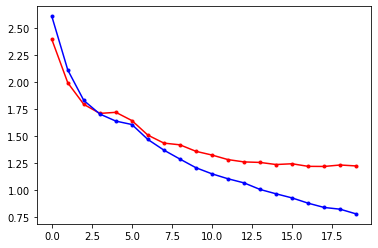

In [22]:
# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trinset_loss')